# Imports

In [13]:
import math

def f(n, m):
    return math.gcd(n, m) ** 3 == n * m

limit = 2 ** 2 * 3 ** 2 * 5 ** 2 * 7 ** 2 * 11 ** 2
for n in range(limit, limit + 1):
    count = 0
    for m in range(1, limit):
        if f(n, m):
            count = count + 1
    if count > 20:
        print(count)

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_theme(style="whitegrid")

# Data

## Reading

In [9]:
def read_data(file_path, index_col=None):
    """
    Read data from CSV or Excel file and drop unnecessary columns.
    
    Returns:
    - df (DataFrame): Filtered DataFrame.
    - headers (list): List of column headers.
    """
    if file_path.endswith('.xlsx'):
        df = pd.read_excel(file_path, index_col=index_col)
    elif file_path.endswith('.csv'):
        df = pd.read_csv(file_path, index_col=index_col)
    else:
        raise ValueError("Unsupported file format. Please provide a .csv or .xlsx file.")
    
    return df

In [10]:
file_path = "../../../data/dominica-bermant.csv"

df = read_data(file_path, index_col= 'codaNUM2018')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8719 entries, 1 to 8878
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      8719 non-null   object 
 1   nClicks   8719 non-null   int64  
 2   Duration  8719 non-null   float64
 3   ICI1      8719 non-null   float64
 4   ICI2      8719 non-null   float64
 5   ICI3      8719 non-null   float64
 6   ICI4      8719 non-null   float64
 7   ICI5      8719 non-null   float64
 8   ICI6      8719 non-null   float64
 9   ICI7      8719 non-null   float64
 10  ICI8      8719 non-null   float64
 11  ICI9      8719 non-null   float64
 12  CodaType  8719 non-null   object 
 13  Clan      8719 non-null   object 
 14  Unit      8719 non-null   object 
 15  UnitNum   8719 non-null   int64  
 16  IDN       8719 non-null   object 
dtypes: float64(10), int64(2), object(5)
memory usage: 1.2+ MB


## Missing Values

In [11]:
print(df.isnull().sum())

Missing Values
Date        0
nClicks     0
Duration    0
ICI1        0
ICI2        0
ICI3        0
ICI4        0
ICI5        0
ICI6        0
ICI7        0
ICI8        0
ICI9        0
CodaType    0
Clan        0
Unit        0
UnitNum     0
IDN         0
dtype: int64


# Numerical Data Analysis

In [13]:
def get_date(date_string: str):
    date_string = date_string.split(' ')[0]
    if date_string.find('-') == 4:
        date_string = date_string[-2:] + '-' + date_string[5: 7] + '-' + date_string[:4]
    return date_string

In [14]:
df_with_date = df.copy()
df_with_date.Date = pd.to_datetime(df.Date.apply(get_date), dayfirst=True)
df_with_date_idx = df_with_date.set_index('Date')
df_with_date_idx.sort_index(inplace=True)
print("DataFrame after setting datetime index:")
df_with_date_idx.head()

DataFrame after setting datetime index:


,nClicks,Duration,ICI1,ICI2,ICI3,ICI4,ICI5,ICI6,ICI7,ICI8,ICI9,CodaType,Clan,Unit,UnitNum,IDN
Date,,,,,,,,,,,,,,,,
2005-01-15,10,0.322,0.028,0.037,0.032,0.031,0.029,0.033,0.037,0.045,0.05,10i,EC1,T,10,0
2005-01-15,5,0.331,0.088,0.099,0.081,0.063,0.000,0.000,0.000,0.000,0.00,5R1,EC1,T,10,0
2005-01-15,5,0.319,0.079,0.101,0.076,0.063,0.000,0.000,0.000,0.000,0.00,5R1,EC1,T,10,0
2005-01-15,5,0.320,0.076,0.100,0.078,0.066,0.000,0.000,0.000,0.000,0.00,5R1,EC1,T,10,0
2005-01-15,5,0.311,0.074,0.081,0.083,0.073,0.000,0.000,0.000,0.000,0.00,5R1,EC1,T,10,0


In [15]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical Columns:", numerical_cols)

Numerical Columns: ['nClicks', 'Duration', 'ICI1', 'ICI2', 'ICI3', 'ICI4', 'ICI5', 'ICI6', 'ICI7', 'ICI8', 'ICI9', 'UnitNum']


## Statistics

In [17]:
df[numerical_cols].describe()

,nClicks,Duration,ICI1,ICI2,ICI3,ICI4,ICI5,ICI6,ICI7,ICI8,ICI9,UnitNum
count,8719.000000,8719.000000,8719.000000,8719.000000,8719.000000,8719.000000,8719.000000,8719.000000,8719.000000,8719.000000,8719.000000,8719.000000
mean,5.257828,0.837282,0.258228,0.242347,0.159417,0.134930,0.019075,0.011777,0.006559,0.003563,0.001385,5.635050
std,1.118491,0.407882,0.144061,0.133588,0.082596,0.085942,0.055907,0.040322,0.030693,0.022442,0.015136,3.882283
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.000000,0.386500,0.105000,0.101000,0.079700,0.067000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,5.000000,0.852383,0.259650,0.248490,0.162000,0.140500,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,5.000000,1.176800,0.385407,0.354738,0.202531,0.186100,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
max,10.000000,3.035173,0.798560,0.660200,0.593074,0.707282,0.773353,0.412600,0.473983,0.399500,0.337658,13.000000


## Histograms

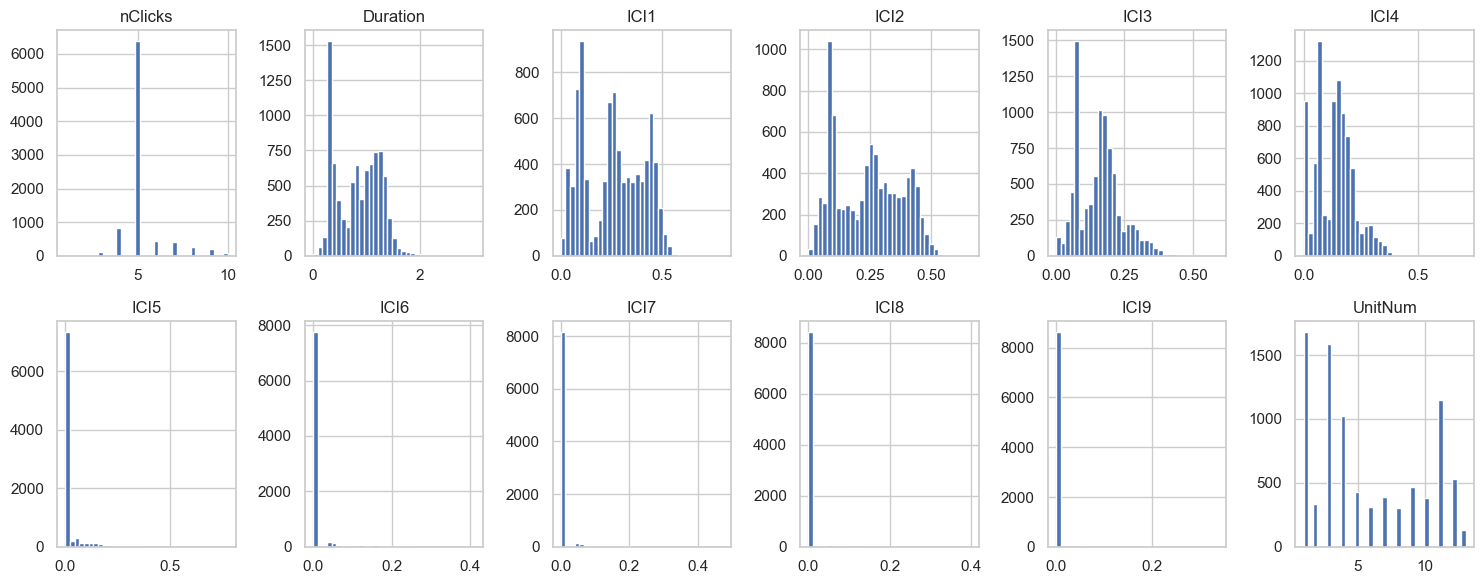

In [22]:
df[numerical_cols].hist(bins=35, figsize=(15, 6), layout=(2, len(numerical_cols)//2))
plt.tight_layout()
plt.show()

> Мы ничего не можем понять имея только данные о ICI-X.
>
> Что такое ICI - inter-click-information, или же “сколько времени между текущим и следующим кликом”. В отрыве от остальных данных по типу CodaType, ClanType, Unit и тд, время между кликами не дает ничего. Каждый ICI должен рассматриваться внутри определенных условий.

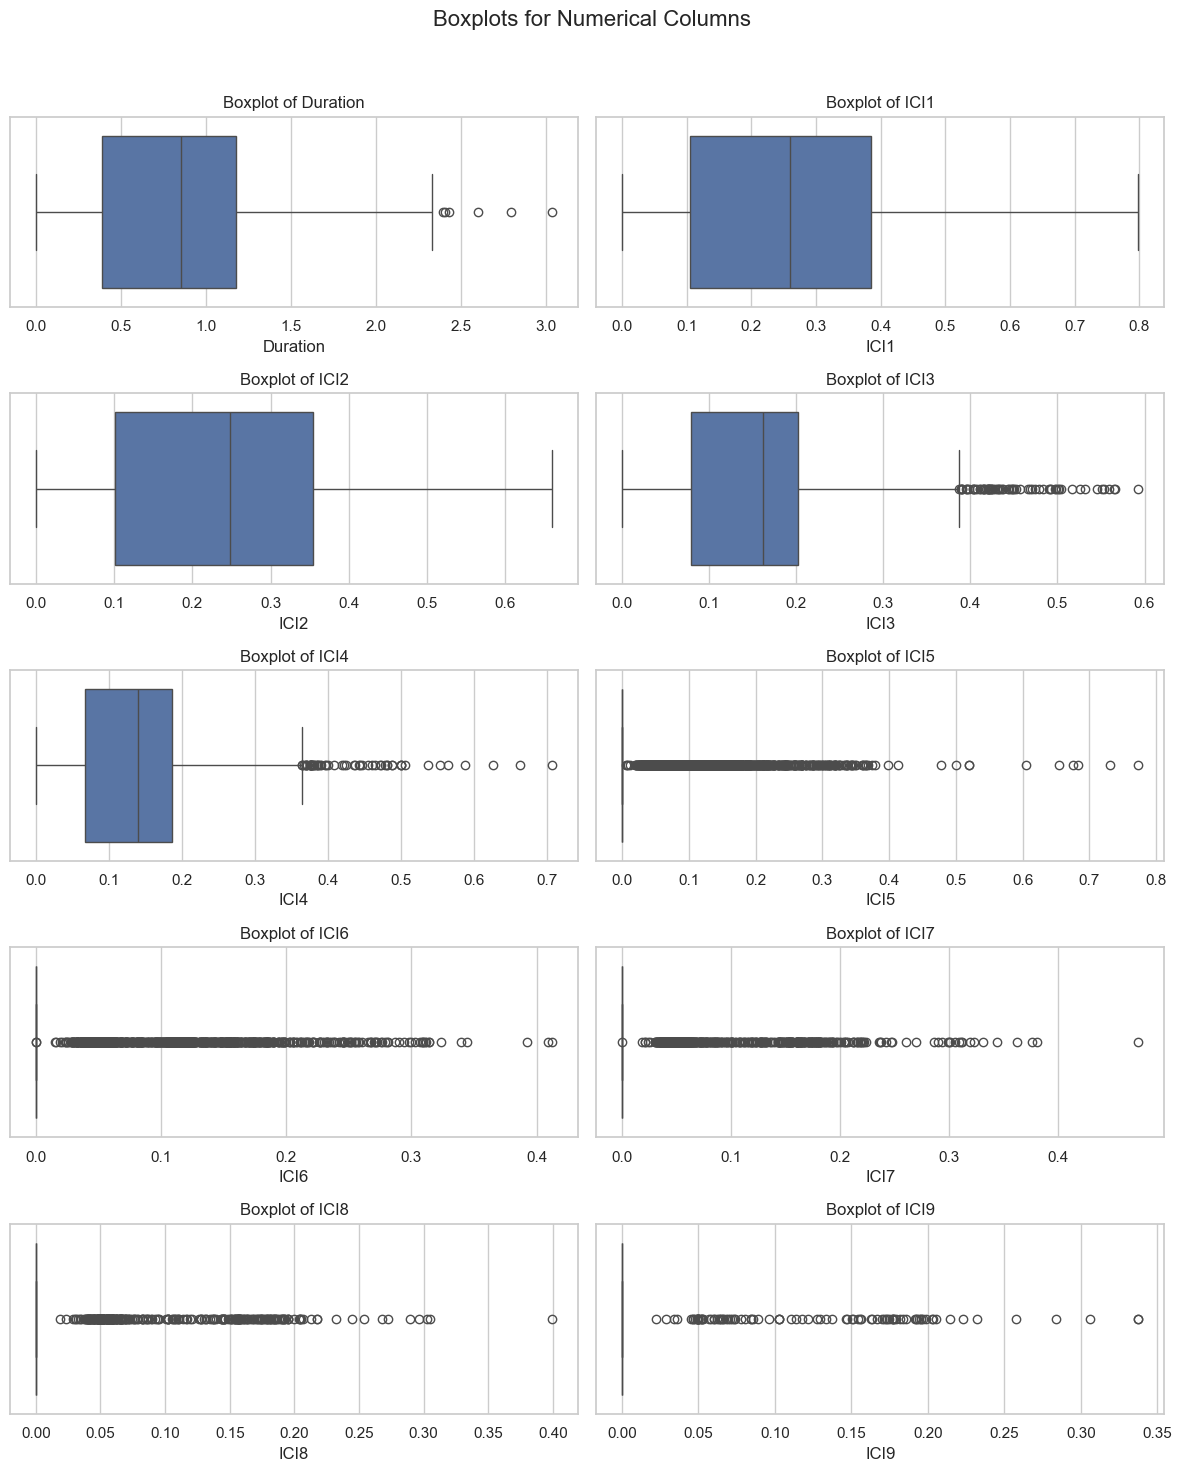

In [25]:
n_cols = 2
n_rows = (len(numerical_cols[1:-1]) + 1) // n_cols  # Calculate the necessary rows

# Set up the figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))  # Adjust size as needed
fig.suptitle('Boxplots for Numerical Columns', fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, col in enumerate(numerical_cols[1:-1]):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hide any remaining empty subplots
for j in range(i + 1, n_rows * n_cols):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit titles
plt.show()

> Очевидно, что боксплоты показывают столько аутлаеров, потому что ICI-X внутри каждой коды уникален.

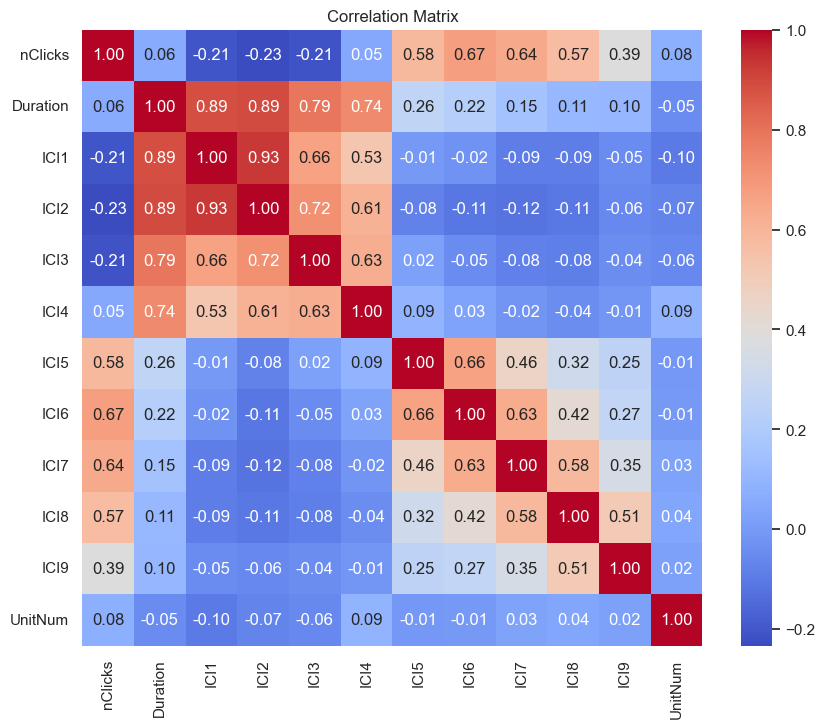

In [219]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

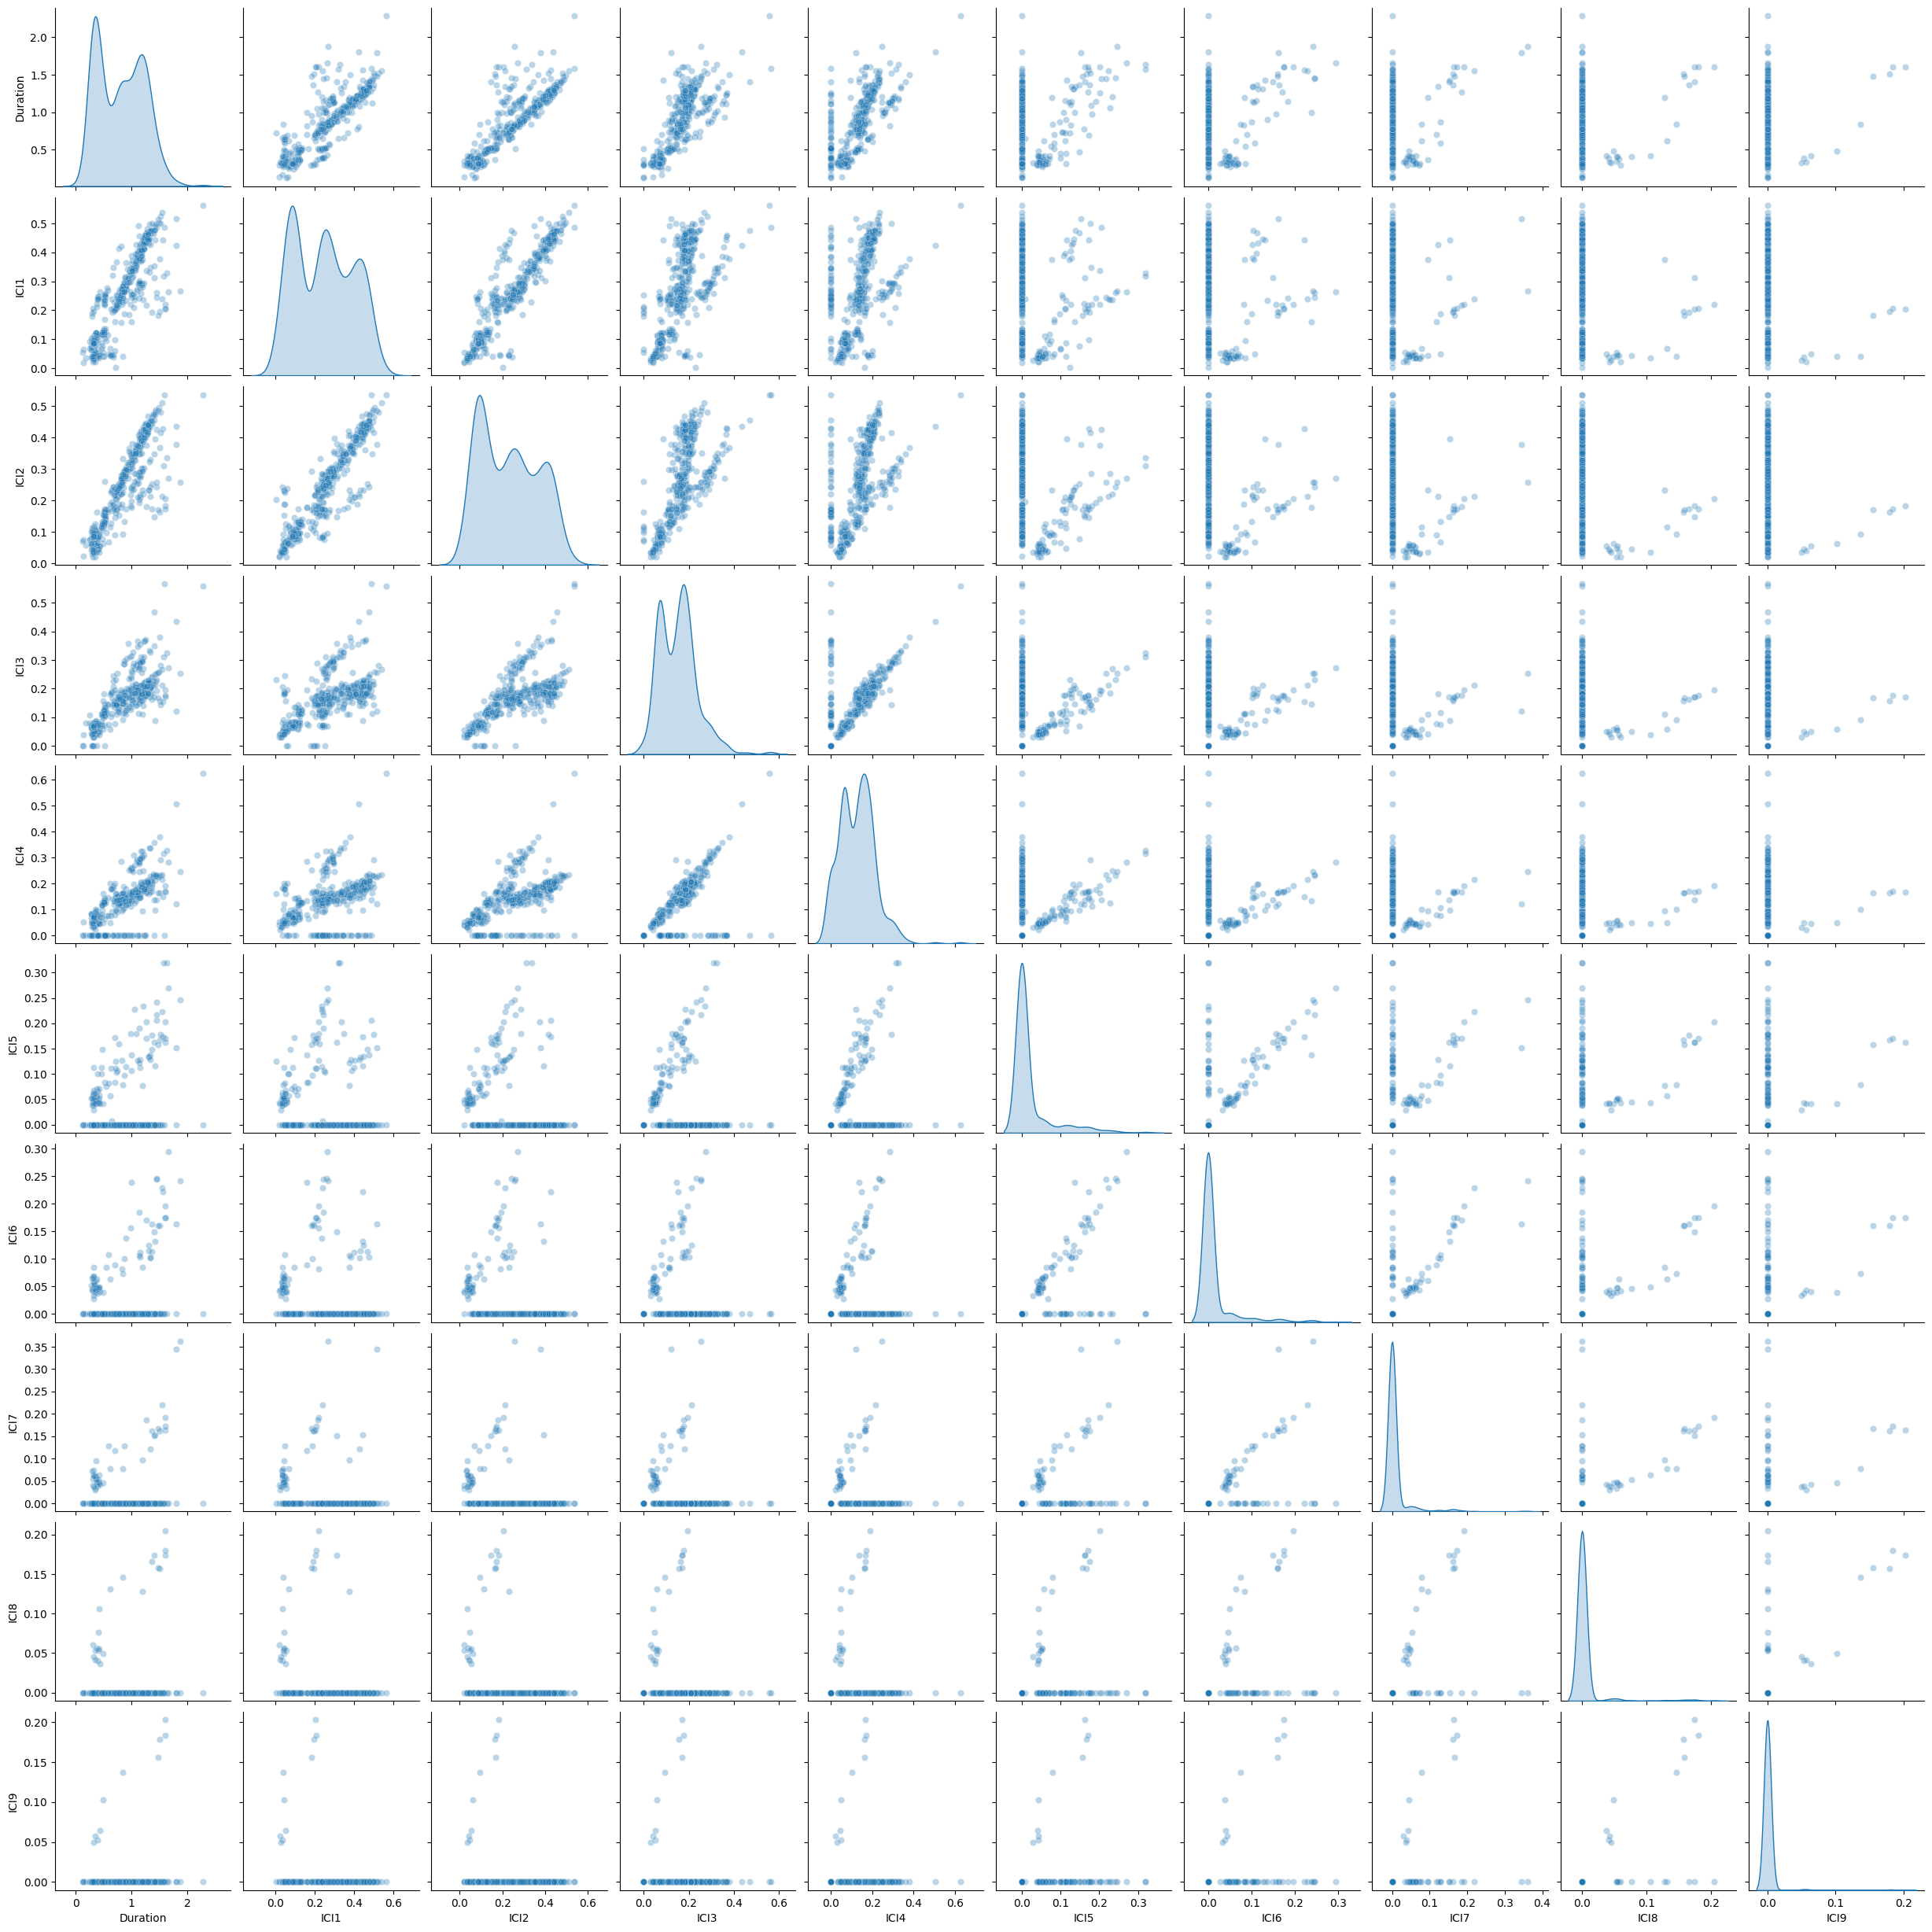

In [28]:
sampled_df = df[numerical_cols[1:-1]].dropna().sample(n=500) if len(df) > 500 else df[numerical_cols[1:-1]].dropna()

pairplot = sns.pairplot(sampled_df, diag_kind="kde", plot_kws={'alpha': 0.3})  # Lower alpha for scatter plots
plt.show()

> И снова корреляция ничего не показывает. Рассмотри дальше

# Categorical Data Analysis

In [29]:
categorical_cols = df_with_date.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nCategorical Columns:", categorical_cols)


Categorical Columns: ['CodaType', 'Clan', 'Unit', 'IDN']


In [30]:
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())


Value counts for CodaType:
 CodaType
1+1+3       3589
5R1         1510
5R3          642
4R2          340
5R2          287
5-NOISE      280
4D           219
6i           188
8i           178
7D1          177
6-NOISE      172
7i           151
9i           137
4R1           84
2+3           77
1+32          72
6R            67
3D            61
8R            60
10i           55
4-NOISE       51
1+31          51
9R            43
7D2           35
10R           32
7R            23
3-NOISE       21
3R            21
8D            20
7-NOISE       19
8-NOISE       17
9-NOISE       16
10-NOISE       9
1-NOISE        9
2-NOISE        6
Name: count, dtype: int64

Value counts for Clan:
 Clan
EC1    7770
EC2     949
Name: count, dtype: int64

Value counts for Unit:
 Unit
A      1680
F      1587
U      1152
J      1024
V       530
S       464
K       426
P       388
T       382
D       336
N       313
R       302
ZZZ     135
Name: count, dtype: int64

Value counts for IDN:
 IDN
0            5705
558

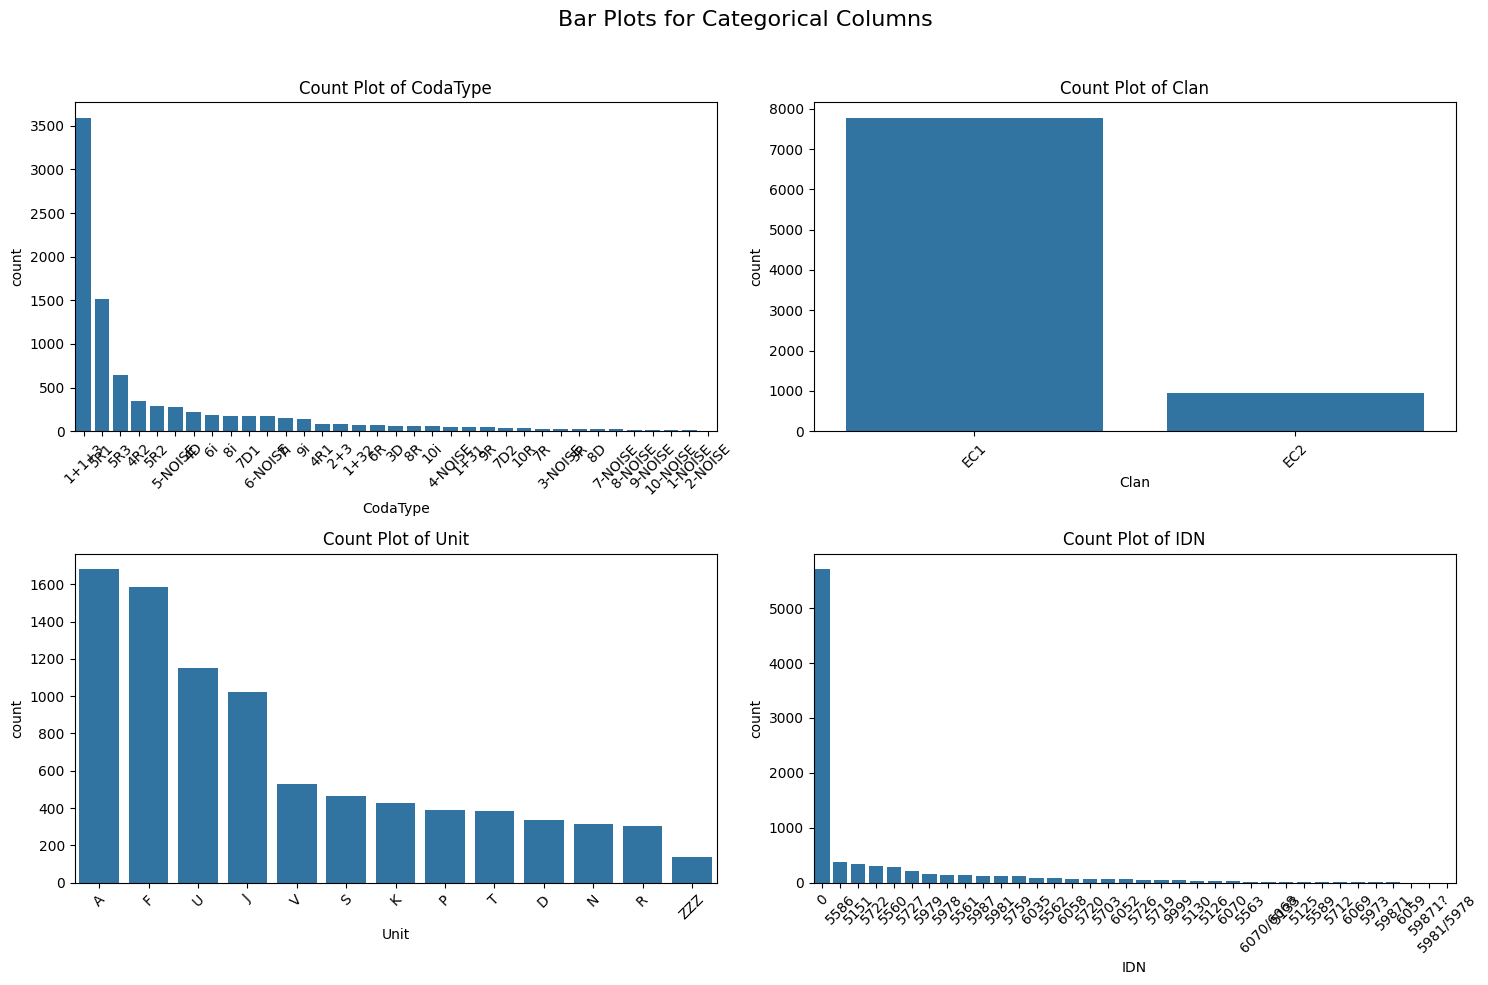

In [31]:
n_cols = 2
n_rows = (len(categorical_cols) + 1) // n_cols  # Calculate rows needed based on number of columns

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
fig.suptitle('Bar Plots for Categorical Columns', fontsize=16)

axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-ticks for readability

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent title overlap
plt.show()

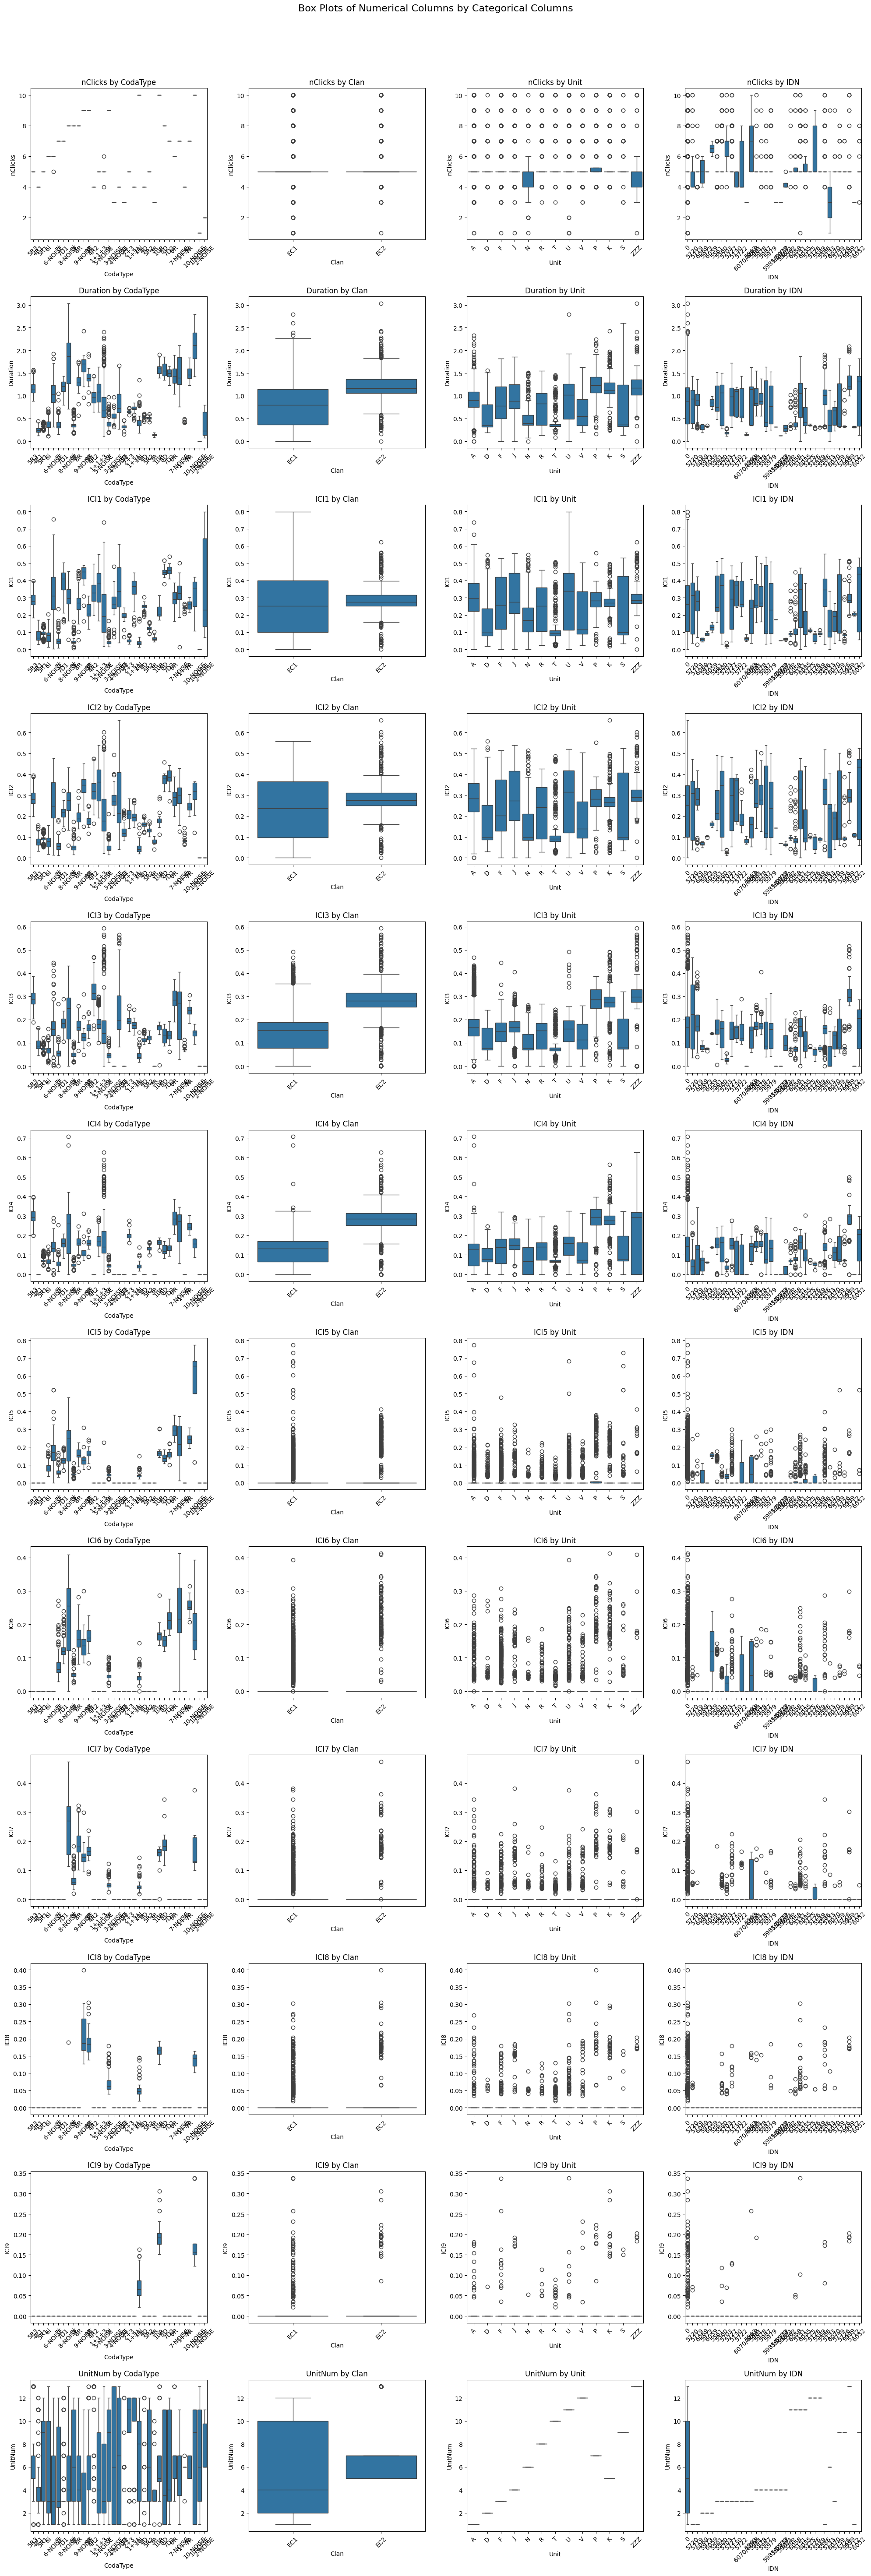

In [32]:
n_cols = len(categorical_cols)
n_rows = len(numerical_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
fig.suptitle('Box Plots of Numerical Columns by Categorical Columns', fontsize=16)

for row_idx, num_col in enumerate(numerical_cols):
    for col_idx, cat_col in enumerate(categorical_cols):
        ax = axes[row_idx, col_idx]
        sns.boxplot(x=cat_col, y=num_col, data=df, ax=ax)
        ax.set_title(f'{num_col} by {cat_col}')
        ax.tick_params(axis='x', rotation=45)  # Rotate x-ticks for readability

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the main title
plt.show()

1. Кода всегда имеет определенное кол-во кликов.
2. Кода определенного типа может встречаться не у всех кланов. Так как по кол-ву кликов можно понять, что это за кода -> не все коды используется вторым кланом.
3. Не все юниты умеют (могут/хотят) говорить все коды
   Та же самая логика, что и в предыдущем пункте.
4. Продолжительность код довольно стабильна. По продолжительности в каком-то виде можно определять коду

5. Так как у кланов могут быть свои уникальные коды, средняя продолжительность код отличается от клана к клану. То же самое касается и юнитов.

6. Также из предыдущего пункта вытекает, что продолжительность ICI-X внутри каждого клана/юнита будет различной. 

7. Рассматривая ICI внутри разных код можно увидеть, что они действительно имеют схожие значения. Пока что мы просто убедились, что коды можно однозначно определять по ICI.
